### 导入依赖包

将tensorflow、numpy和matplotlib导入，如果已经安装tensorflow则可以不用执行下面这一行代码，如果没有安装tensorflow需要执行下面这一行代码

In [1]:
! pip install tensorflow-cpu==2.4.0 -i https://pypi.douban.com/simple/

Looking in indexes: https://pypi.douban.com/simple/


In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.4.0


### 加载数据集

使用tensorflow内置的mnist数据集，返回训练集图片、训练集标签、测试集图片、测试集标签

In [3]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


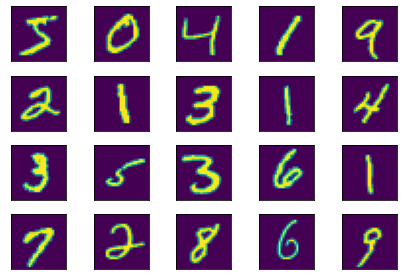

In [4]:
fig, ax = plt.subplots(nrows=4, ncols=5, sharex='all', sharey='all')
ax = ax.flatten()
for i in range(20):
    img = train_images[i]
    ax[i].imshow(img)
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

### 对图片进行归一化

图片每个像素的数值都是在[0, 255]之间，所以归一化要除以255，数据要是浮点数，所以要添加一个小数点

In [5]:
train_images, test_images = train_images / 255.0, test_images / 255.0

### 定义模型

搭建一个顺序模型，第一层先将数据展平，原始图片是28x28的灰度图，所以输入尺寸是（28，28），第二层节点数可以自己选择一个合适值，这里用128个节点，激活函数用relu，第三层有多少个种类就写多少，[0, 9]一共有10个数字，所以必须写10，激活函数用softmax

In [6]:
model = tf.keras.Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(1000, activation='relu'),
    Dense(10, activation='softmax')
])

### 指定优化器、损失函数、评价指标

优化器使用adam，损失函数使用交叉熵损失函数，评价指标用准确率

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

### 训练模型

将训练集输入模型进行训练，一共训练10次

In [8]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels), verbose=2)

Epoch 1/10
1875/1875 - 12s - loss: 0.1853 - acc: 0.9443 - val_loss: 0.0948 - val_acc: 0.9710
Epoch 2/10
1875/1875 - 11s - loss: 0.0754 - acc: 0.9771 - val_loss: 0.0686 - val_acc: 0.9783
Epoch 3/10
1875/1875 - 11s - loss: 0.0491 - acc: 0.9845 - val_loss: 0.0757 - val_acc: 0.9767
Epoch 4/10
1875/1875 - 11s - loss: 0.0341 - acc: 0.9890 - val_loss: 0.0797 - val_acc: 0.9772
Epoch 5/10
1875/1875 - 11s - loss: 0.0260 - acc: 0.9918 - val_loss: 0.0891 - val_acc: 0.9772
Epoch 6/10
1875/1875 - 11s - loss: 0.0206 - acc: 0.9932 - val_loss: 0.0727 - val_acc: 0.9820
Epoch 7/10
1875/1875 - 11s - loss: 0.0182 - acc: 0.9940 - val_loss: 0.0633 - val_acc: 0.9824
Epoch 8/10
1875/1875 - 11s - loss: 0.0142 - acc: 0.9950 - val_loss: 0.0883 - val_acc: 0.9807
Epoch 9/10
1875/1875 - 11s - loss: 0.0143 - acc: 0.9954 - val_loss: 0.0938 - val_acc: 0.9800
Epoch 10/10
1875/1875 - 11s - loss: 0.0114 - acc: 0.9960 - val_loss: 0.1023 - val_acc: 0.9801


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 1000)              785000    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


### 用测试集验证模型效果

用测试集去验证训练好的模型，日志等级设置为2

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('Test loss:', test_loss)
print('Test acc:', test_acc)

313/313 - 1s - loss: 0.1023 - acc: 0.9801
Test loss: 0.10226897895336151
Test acc: 0.9800999760627747


### 将图片输入模型，返回预测结果

将测试集中的第一张图片输入模型，看是哪个数字的概率最大，并输出真实值

预测值: 7
真实值: 7


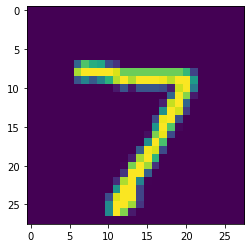

In [11]:
predictions = model.predict(test_images)
print('预测值:', np.argmax(predictions[0]))
print('真实值:', test_labels[0])
plt.imshow(test_images[0])
plt.show()

### 显示模型准确率的变化过程

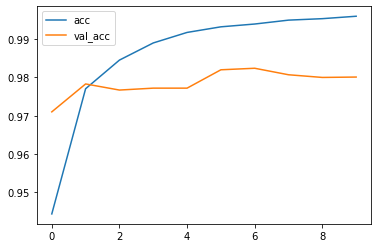

In [12]:
#横坐标、纵坐标、标签
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.plot(history.epoch, history.history.get('val_acc'), label='val_acc')
plt.legend()       #绘图
plt.show()         #显示图像

### 显示模型损失的变化过程

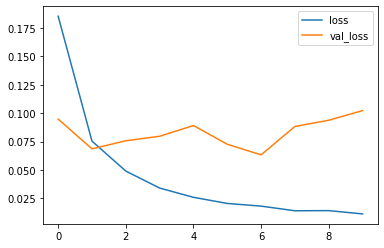

In [13]:
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.plot(history.epoch, history.history.get('val_loss'), label='val_loss')
plt.legend()
plt.show()